In [97]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import time

In [98]:
#1 Non attractive fixed points
#P(z) = z^2 + 1/4 = z

###Question 1, find a fixed non-attractive point for c = 1/4 --> returns 1/2 
  
  #No fixed NA points?
import numpy as np
import math
def f1(c): # takes in a number c. Uses the quadratic formula to generate two solutions
  q1 = (1+ (1**2 - 4*c)**(1/2)) / 2 #positive solution
  q2 = (1- (1**2 - 4*c)**(1/2)) / 2 #negative solution
  if abs(q1) >= 1: #returns only the solution that is positive
    return q1
  if abs(q2) >= 1:
    return q2


In [99]:
f1(complex(2,0))

(0.5000000000000001+1.3228756555322954j)

In [101]:
#2 List for Jn(p)
# N>0 is fixed, so all N inputs are positive integers
def f2(c, N): #c is some complex number, N is the # of times the function is called
  tlist = [] #list of each instance of f1(x)
  for _ in range(N): #loop for calling f1. n = 1,...,N
    c = f1(c)            # <------ trying to call f1(c) some number of times
    tlist.append(c)      # adds the value of p to the list
  return tlist


In [105]:
f2(complex(2,1),5)

[(0.8643929452353858-1.372145115699254j),
 (1.1667171316871796+1.0290309416730703j),
 (0.9803252676417578-1.071181354590485j),
 (1.03204002388382+1.006673658469344j),
 (0.9963398046186616-1.0140972465857063j)]

In [117]:
#3 plot specific points in Pyplot
def f2Plot(points):
  #Essentially the same plot function used in HW 5
  x = [z.real for z in points]
  y = [z.imag for z in points]
  plt.plot(x,y)

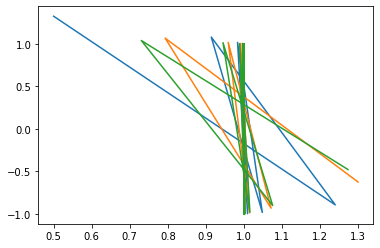

In [118]:
f2Plot(f2(complex(2,0),20)) #blue - 2+0i
f2Plot(f2(complex(0,1),20)) #orange - 0+i
f2Plot(f2(complex(-.12,.74),20)) #green - -0.12+0.74i

In [13]:
#4 Plt.imshow does not take complex numbers directly. Using previous code allows an image to be displayed properly
def newtonstep(coefficients,guess):
  '''
  Returns an improved guess for a root of the quadratic 
  also returns p(z)
  az^2+bz+c
  Inputs:
    coefficients - list of n+1 coefficients for n coefficients 
                  - first coefficient is a0


  '''
  z=guess
  pOfz = sum([a*z**(n) for n, a in enumerate(coefficients)])
  pPrimeOfz = sum([ n*a*z**(n-1) for n, a in enumerate(coefficients) if n>0])
  return (z-pOfz/pPrimeOfz, pOfz)

def decideWhichRoot(coefficients, initial_guess, tolerance, maxIter):
  current_guess = initial_guess 
  iterations = 0
  pOfz = 2*tolerance
  while abs(pOfz) > tolerance and iterations < maxIter:
    current_guess, pOfz = newtonstep(coefficients, current_guess)
    iterations = iterations + 1
  return (current_guess*(1+1j)).real

def newtonPicture(coefficients, center, sideLength, subs, tolerance, maxIter):
  '''
  Inputs: 
  -- center, a complex number
  -- sideLength, a real number (used to be 4, since [-2,2]^2 has length 4)
  -- subs, an integer, number of subdivisions

    We'll subdivide the square centered at the center, with given sidelength
     into little squares
        and test points in the center of each square.
        If the tested point escapes, we mark a '1' in the matrix.
  '''
  delta = sideLength/(2*subs) 
  startx = center.real- sideLength/2
  starty = center.imag - sideLength/2
  results = np.zeros((subs,subs)) # square matrix with dimensions sub x sub
  for i in range(subs):
    for j in range(subs):
      z = complex(startx+delta,starty+delta)+complex(i*2*delta, j*2*delta)
      result = decideWhichRoot(coefficients, z, tolerance, maxIter)
      results[j,i] = result 
      
  return results 

In [69]:
#f1 is used to generate the complex number as only 1 number is needed
pic = newtonPicture([-1, 0,0,1], f1(complex(2,0)), 2, 200, 0.001, 30)
pic2 = newtonPicture([-1, 0,0,1], f1(complex(0,1)), 2, 200, 0.001, 30)
pic3 = newtonPicture([-1, 0,0,1], f1(complex(-.12,.74)), 2, 200, 0.001, 30)

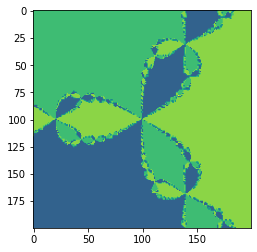

In [70]:
plt.imshow(pic)
plt.imshow(pic2)
plt.imshow(pic3)

In [37]:
#5 We will be making modification (c) on the code and timing both functions
#----Original code----
#The code is going to print the time elapsed. The original results are going to be added to a placebo list to preserve the function
def timed_f1(c): # takes in a number c. Uses the quadratic formula to generate two solutions
  start = time.time()
  list = []
  q1 = (1+ (1**2 - 4*c)**(1/2)) / 2 #positive solution
  q2 = (1- (1**2 - 4*c)**(1/2)) / 2 #negative solution
  if abs(q1) >= 1: #returns only the solution that is positive
    list.append(q1)
  if abs(q2) >= 1:
    list.append(q2)
  end = time.time()
  return end-start


In [38]:
#5 modified code, where the solution is determined by chance
def timed_f1Mod(c): # takes in a number c. Uses the quadratic formula to generate two solutions
  start = time.time()
  chance = random.random() #variable for the probability
  list = []
  q1 = (1+ (1**2 - 4*c)**(1/2)) / 2 #positive solution
  q2 = (1- (1**2 - 4*c)**(1/2)) / 2 #negative solution
  if chance > 0.5: #appends the result based on a 50/50 chance
    list.append(q1)
  else:
    list.append(q2)
  end = time.time()
  return end-start

In [39]:
timed_f1(complex(2,1))

1.2159347534179688e-05

In [40]:
timed_f1Mod(complex(2,1))

1.4066696166992188e-05

In [43]:
#simple function for finding the average time it takes for both functions to run
def avg_time(f,N): #takes in: a function and a number of instances
  avg = 0
  for _ in range(N):
    avg += f
  return avg/N

In [116]:
avg_time(timed_f1(complex(2,1)),50) #original function with time measurement implemented

9.775161743164062e-06

In [115]:
avg_time(timed_f1Mod(complex(2,1)),50) #the function modified to use probability

9.298324584960938e-06

In [ ]:
'''
Regarding the elapsed time:
In both instances, the elapsed time tends to be either 1.0..., 8.0..., or 9.0....
There is no discernable difference in the overall time elapsed between the original function
and the modification in which probability is used to find a solution
'''

In [ ]:
#5 - testing the image quality

In [71]:
#5 modified code, where the solution is determined by chance
def f1Mod(c): # takes in a number c. Uses the quadratic formula to generate two solutions
  chance = random.random() #variable for the probability
  q1 = (1+ (1**2 - 4*c)**(1/2)) / 2 #positive solution
  q2 = (1- (1**2 - 4*c)**(1/2)) / 2 #negative solution
  if chance > 0.5: #appends the result based on a 50/50 chance
    return q1
  else:
    return q2

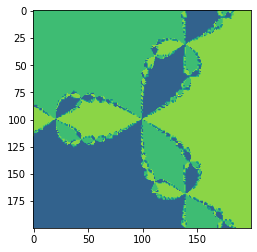

In [72]:
mpic = newtonPicture([-1, 0,0,1], f1Mod(complex(2,0)), 2, 200, 0.001, 30)
mpic2 = newtonPicture([-1, 0,0,1], f1Mod(complex(0,1)), 2, 200, 0.001, 30)
mpic3 = newtonPicture([-1, 0,0,1], f1Mod(complex(-.12,.74)), 2, 200, 0.001, 30)

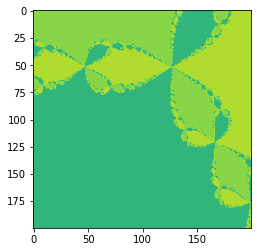

In [75]:
#modified version of the image
plt.imshow(mpic)
plt.imshow(mpic2)
plt.imshow(mpic3)

In [ ]:
'''
regarding the image quality:
Both images are unchanging, so running the function over and over will not change it.
Despite the fact that the modified version of the code also relies on probability
What we can visibily notice is a both images appear to be the same in nature, however
the modified version is shifted upwards and to the right
as a result, the color gradient also appears to be different
'''